In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# upload json cert
# from google.colab import files
# files.upload()
# pending, bash change permissions


In [5]:
!pip install kaggle



In [7]:
!mkdir ~/.kaggle/
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [6]:
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
import kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud
#Downloading creditcardfraud.zip to /content

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 62% 41.0M/66.0M [00:00<00:00, 116MB/s]
100% 66.0M/66.0M [00:00<00:00, 146MB/s]


In [87]:
!unzip /content/drive/MyDrive/XAI/Projects/Data/creditcardfraud.zip -d /content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle

Archive:  /content/drive/MyDrive/XAI/Projects/Data/creditcardfraud.zip
replace /content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [88]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle/creditcard.csv
/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle/creditcardNew (1).csv


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#MODEL SELECTIONS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [93]:
data=pd.read_csv('/content/drive/MyDrive/XAI/Projects/Data/CreditCardFraudDbKaggle/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:

data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
!pip install shap
import xgboost
import shap

#To start with : fit this model to xboost
#model = xgboost.XGBRegressor().fit(data)


In [14]:
x_dummy=data.drop(columns='Class', axis=1)
y=data['Class']

In [15]:
scaler=StandardScaler()
x=scaler.fit_transform(x_dummy)

In [57]:
data.shape

(284807, 31)

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.11, random_state=123)

In [22]:
def logic_regression(x_train, y_train, x_test):
  lr=LogisticRegression()
  lr.fit(x_train, y_train)
  y_train_pred=lr.predict(x_train)
  y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TRAIN MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_train_cl_report)
  y_test_pred=lr.predict(x_test)
  y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TEST MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_test_cl_report)
  print("_"*100)
  return y_test_pred, lr

In [45]:
x_test.shape

(31329, 30)

In [41]:
model = xgboost.XGBRegressor().fit(x_test, y_test,)

In [42]:
explainer = shap.Explainer(model)

In [43]:
shap_values = explainer(x_test)

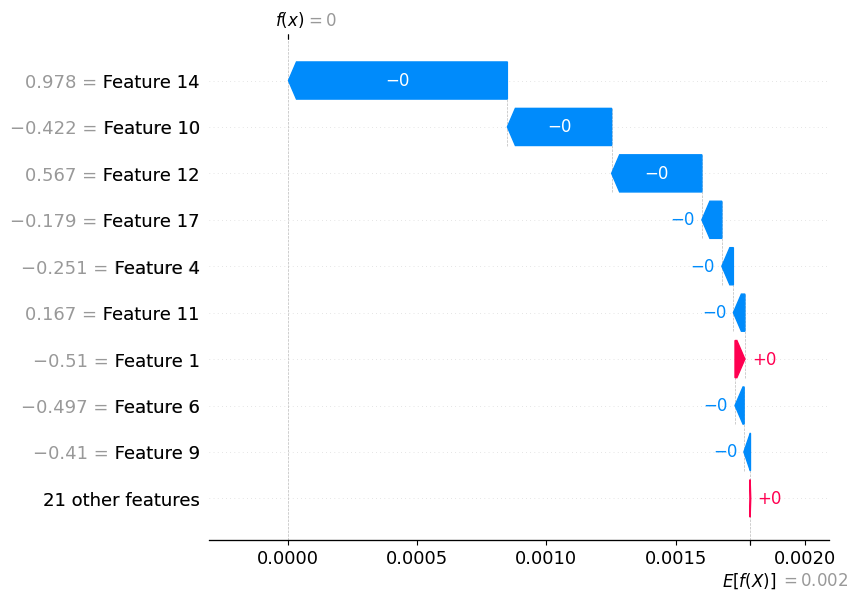

In [94]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[11])